## Introduction

In [1]:
# Importing the necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

In [19]:
# Establishing the connection to the database
conn = sqlite3.connect('instacart.db')

# Loading all the tables
aisles = pd.read_sql_query("SELECT * FROM aisles", conn)
departments = pd.read_sql_query("SELECT * FROM departments", conn)
order_products = pd.read_sql_query("SELECT * FROM order_products", conn)
orders = pd.read_sql_query("SELECT * FROM orders", conn)
products = pd.read_sql_query("SELECT * FROM products", conn)
users_sampled = pd.read_sql_query("SELECT * FROM users_sampled", conn)

# Closing the connection
conn.close()

In [47]:
# conn = sqlite3.connect('instacart.db')
# cursorObj = conn.cursor()
# tables = cursorObj.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
# print(tables.fetchall()[1][0])
# conn.close()

departments


In [3]:
print("Number of aisles:", aisles.shape[0])
print("Number of departments:", departments.shape[0])
print("Size of Ordered Products:", order_products.shape)
print("Size of Orders:", orders.shape)
print("Size of Products:", products.shape)
print("Number of Users:", users_sampled.shape[0])

Number of aisles: 134
Number of departments: 21
Size of Ordered Products: (3923788, 4)
Size of Orders: (414772, 6)
Size of Products: (49688, 5)
Number of Users: 25000


### How the data looks?

In [17]:
aisles.head()

,index,aisle_id,aisle
0,0,1,prepared soups salads
1,1,2,specialty cheeses
2,2,3,energy granola bars
3,3,4,instant foods
4,4,5,marinades meat preparation


In [30]:
departments.head()

,index,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol


In [31]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


In [33]:
products.head()

,index,product_id,product_name,aisle_id,department_id
0,0,1,Chocolate Sandwich Cookies,61,19
1,1,2,All-Seasons Salt,104,13
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,4,5,Green Chile Anytime Sauce,5,13


In [34]:
users_sampled.head()

,user_id
0,187545
1,25444
2,34867
3,172424
4,162611


## Analysis

In [110]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


### Number of orders vs Number of Users

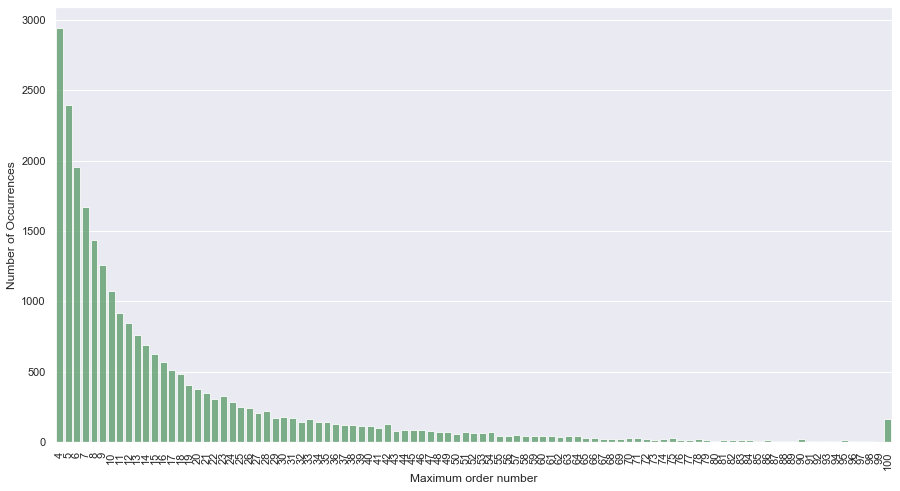

In [14]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The users have made a minimum of 4 orders and a maximum of 100 orders. 

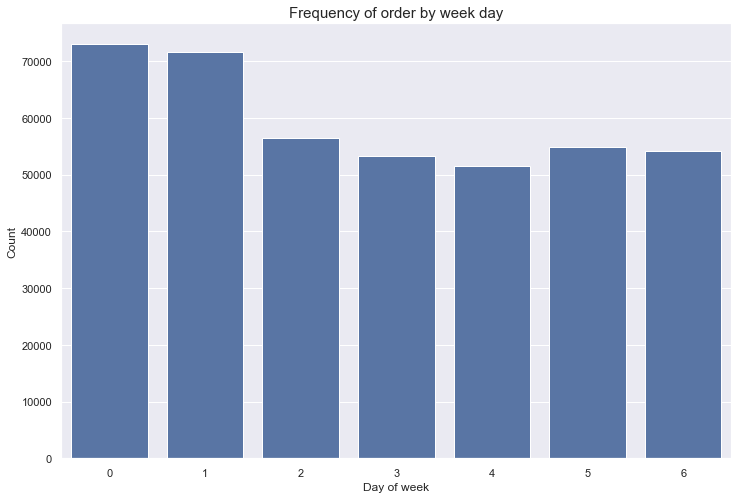

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

The number of orders are higher in the weekdays 0 and 1 when compared to others. Probably 0 and 1 are the weekends and 2 to 6 are the weekdays.

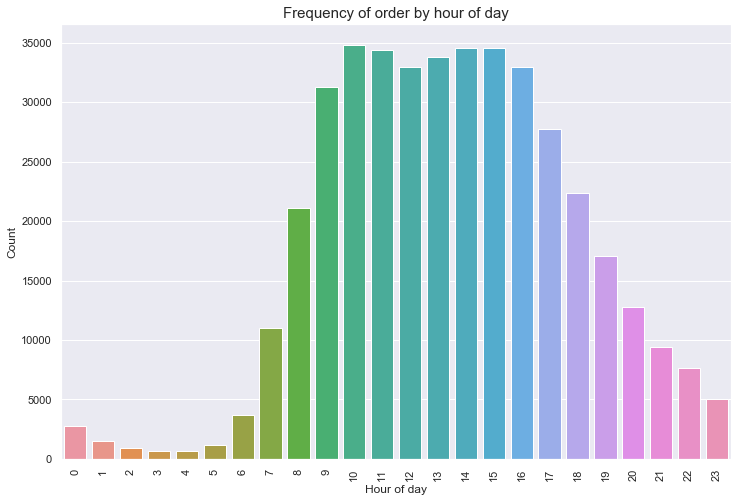

In [76]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

Based on the time of the day, we can say that most of the orders are made during the day starting from 8 AM

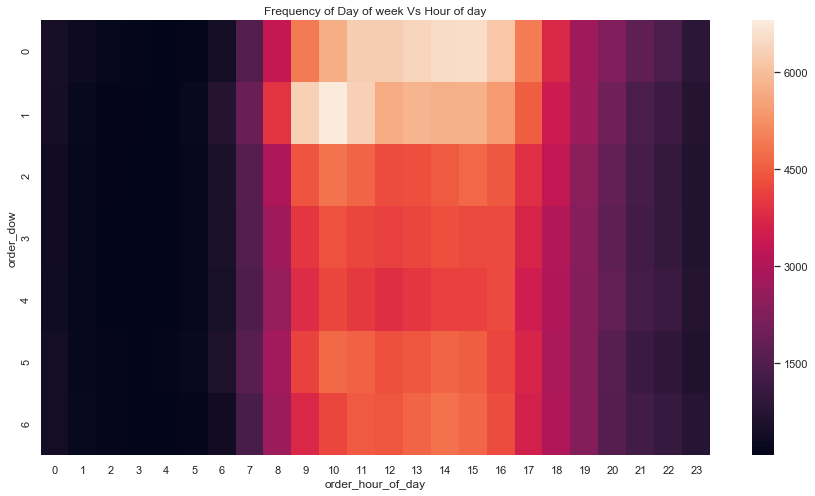

In [13]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,8))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

The heatmap shows that the maximum number of orders are placed during 0th day evening and 1st day morning.

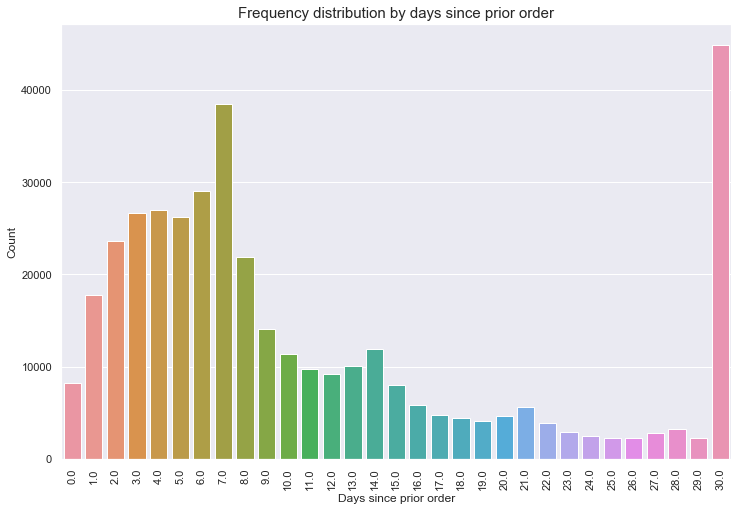

In [77]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).

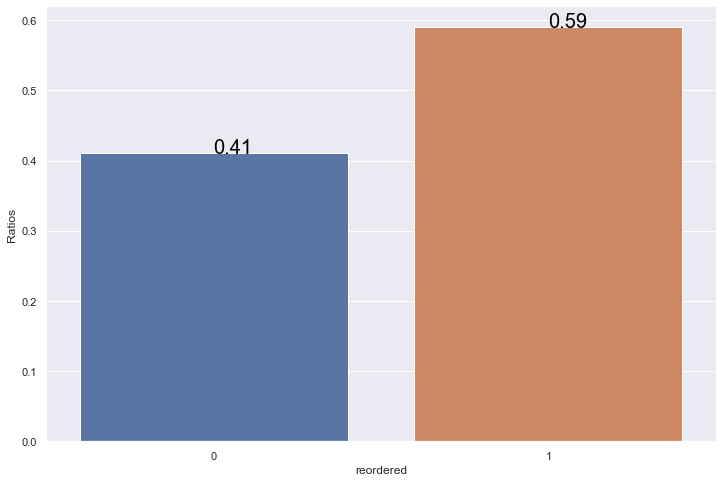

In [47]:
grouped = order_products.groupby('reordered')['product_id'].aggregate({'Total Products': 'count'}).reset_index()
grouped['Ratios'] = grouped["Total Products"].apply(lambda x: round(x/grouped['Total Products'].sum(), 2))

plt.figure(figsize = (12,8))
g = sns.barplot(x='reordered', y = 'Ratios', data = grouped)

for index, row in grouped.iterrows():
    g.text(row.reordered, row.Ratios, row.Ratios, color = 'Black', fontsize = 20)

59% of the products that are in an order are re-ordered products.

In [107]:
grouped_df = order_products.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
round(grouped_df["reordered"].value_counts()/grouped_df.shape[0], 2)

1    0.88
0    0.12
Name: reordered, dtype: float64

About 12% of the orders contain no re-ordered items.

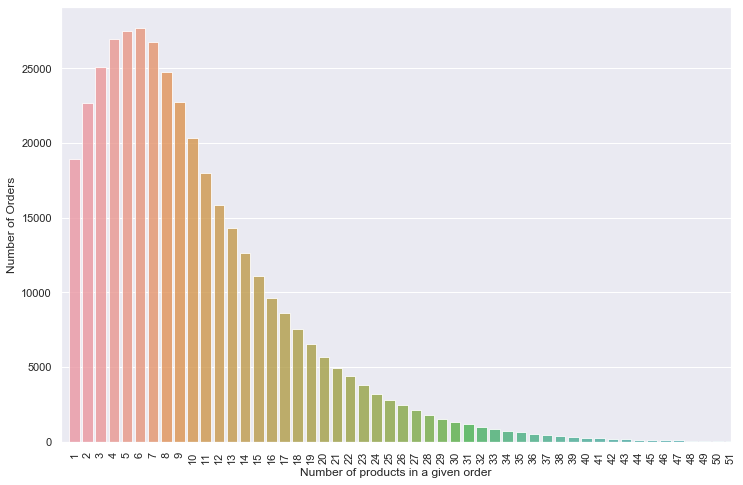

In [51]:
grouped_df = order_products.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Number of products in a given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.xlim(-1,50)
plt.show()

Many number of people like to order 1 to 10 products per order and it then becomes a right tailed distribution.

In [18]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name_x,aisle_id_x,department_id_x,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,index,product_name_y,aisle_id_y,department_id_y
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,3,5,9,8.0,33119,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,3,5,9,8.0,28984,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,3,5,9,8.0,9326,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,3,5,9,8.0,45917,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,3,5,9,8.0,30034,Natural Sweetener,17,13


In [20]:
order_products = pd.merge(order_products, products, on='product_id', how='left')
order_products = pd.merge(order_products, aisles, on='aisle_id', how='left')
order_products = pd.merge(order_products, departments, on='department_id', how='left')

order_products.drop(columns = ["index_x", "index_y", "index"], inplace = True)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [65]:
cnt_srs = order_products['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
for prod in list(cnt_srs['product_name']):
    print(prod)

Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Large Lemon
Limes
Strawberries
Organic Whole Milk
Organic Raspberries
Organic Yellow Onion
Organic Garlic
Organic Zucchini
Organic Blueberries
Cucumber Kirby
Organic Fuji Apple
Apple Honeycrisp Organic
Organic Grape Tomatoes
Organic Lemon


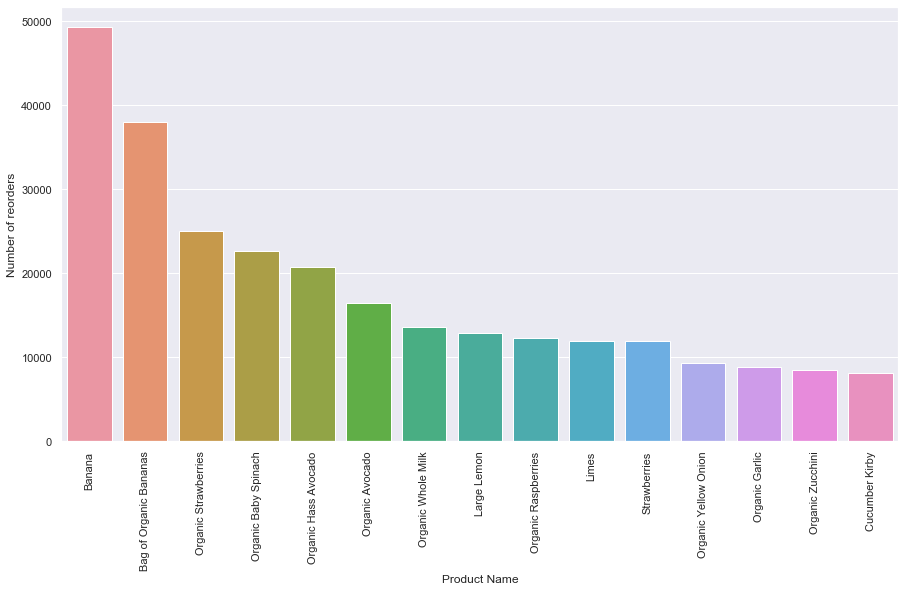

In [114]:
cnt_srs = order_products.groupby('product_name')['reordered'].aggregate('sum').sort_values(ascending = False).reset_index().head(15)
cnt_srs.columns = ['product_name', 'frequency_count']

plt.figure(figsize = (15,8))
sns.barplot(x='product_name', y = 'frequency_count', data = cnt_srs)
plt.xlabel('Product Name')
plt.ylabel('Number of reorders')
plt.xticks(rotation='vertical')
plt.show()

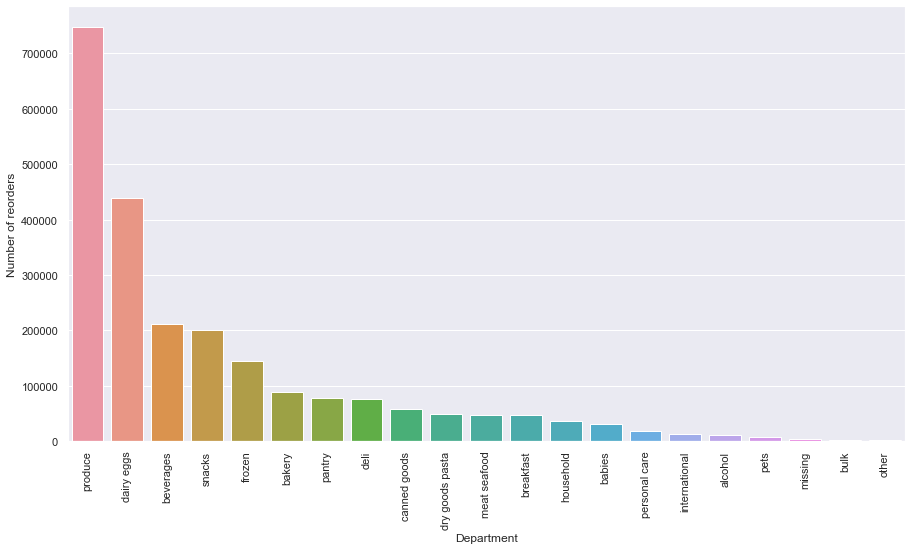

In [116]:
cnt_srs = order_products.groupby('department')['reordered'].aggregate('sum').sort_values(ascending = False).reset_index()
cnt_srs.columns = ['product_name', 'frequency_count']

plt.figure(figsize = (15,8))
sns.barplot(x='product_name', y = 'frequency_count', data = cnt_srs)
plt.xlabel('Department')
plt.ylabel('Number of reorders')
plt.xticks(rotation='vertical')
plt.show()

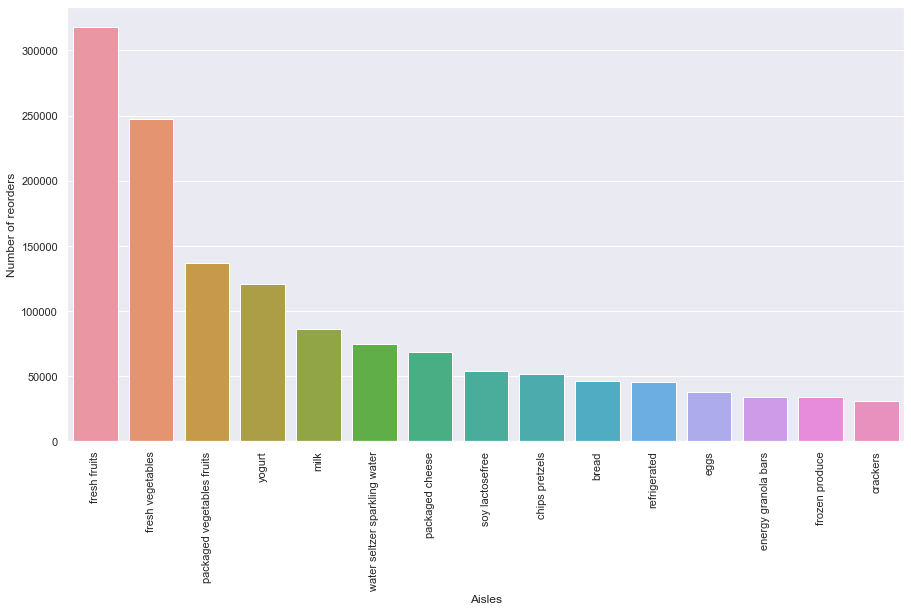

In [117]:
cnt_srs = order_products.groupby('aisle')['reordered'].aggregate('sum').sort_values(ascending = False).reset_index().head(15)
cnt_srs.columns = ['product_name', 'frequency_count']

plt.figure(figsize = (15,8))
sns.barplot(x='product_name', y = 'frequency_count', data = cnt_srs)
plt.xlabel('Aisles')
plt.ylabel('Number of reorders')
plt.xticks(rotation='vertical')
plt.show()

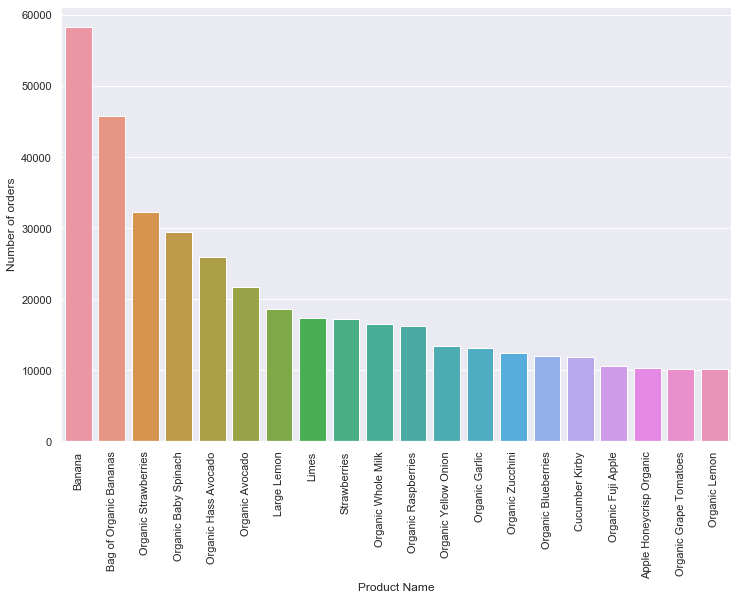

In [53]:
cnt_srs = order_products['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']

plt.figure(figsize = (12,8))
sns.barplot(x='product_name', y = 'frequency_count', data = cnt_srs)
plt.xlabel('Product Name')
plt.ylabel('Number of orders')
plt.xticks(rotation='vertical')
plt.show()

Most of the products that are ordered are organic products most of them being fruits.

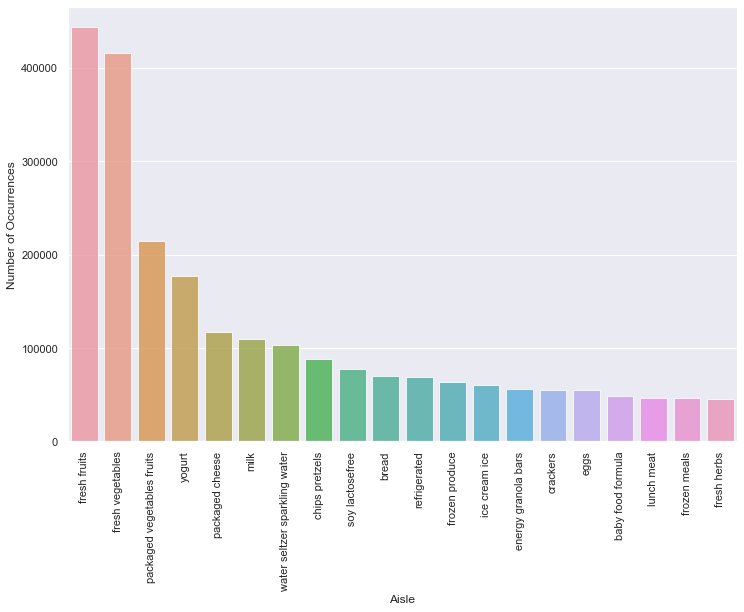

In [80]:
cnt_srs = order_products['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

These are the top 20 aisles where most products are sold. Top two famous aisles of instacart are Fresh Fruits and Fresh Vegetables.

<Figure size 1080x576 with 0 Axes>

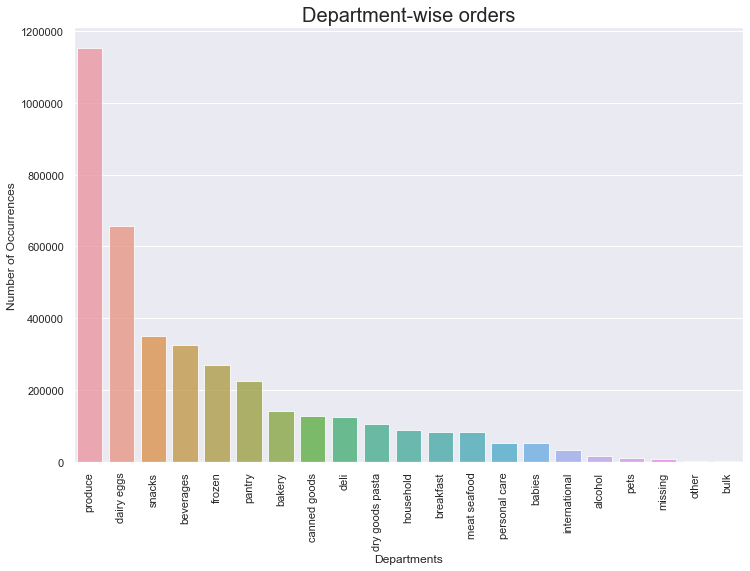

In [79]:
plt.figure(figsize=(15,8))
temp_series = order_products['department'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(temp_series.index, temp_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.title('Department-wise orders', fontsize = 20)
plt.xticks(rotation='vertical')
plt.show()

These are number of orders department-wise. Produce and Dairy Eggs being the top departments in terms of products ordered.

In [21]:
order_products = pd.merge(order_products, orders, on = ['order_id', 'order_id'], how = 'left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,3,5,9,8.0


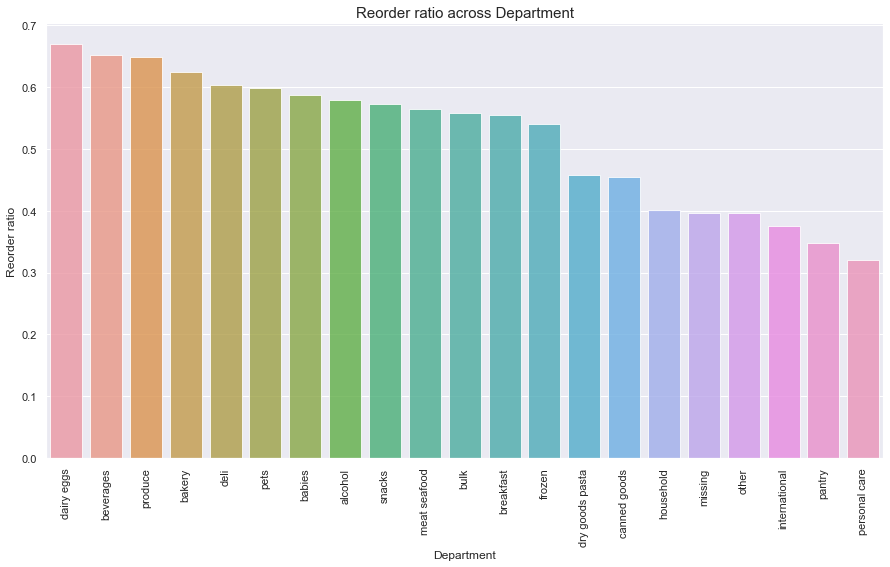

In [123]:
grouped_df = order_products.groupby(["department"])["reordered"].aggregate("mean").reset_index().sort_values(by = 'reordered', ascending = False)

plt.figure(figsize=(15,8))
sns.barplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reorder ratio across Department", fontsize=15)
plt.xticks(rotation='vertical')
#plt.ylim(0.5, 0.7)
plt.show()

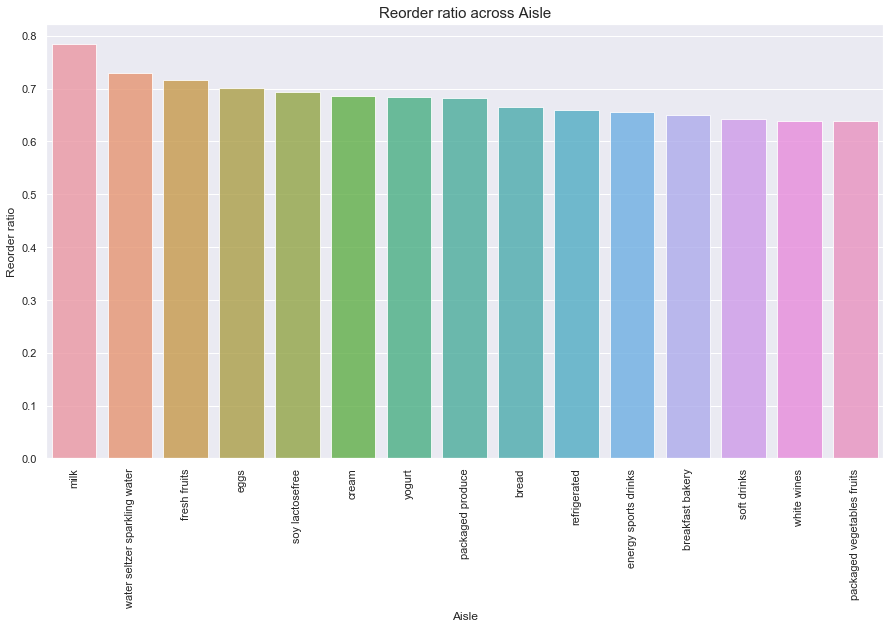

In [23]:
grouped_df = order_products.groupby(["aisle"])["reordered"].aggregate("mean").reset_index().sort_values(by = 'reordered', ascending = False).head(15)

plt.figure(figsize=(15,8))
sns.barplot(grouped_df['aisle'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title("Reorder ratio across Aisle", fontsize=15)
plt.xticks(rotation='vertical')
#plt.ylim(0.5, 0.7)
plt.show()

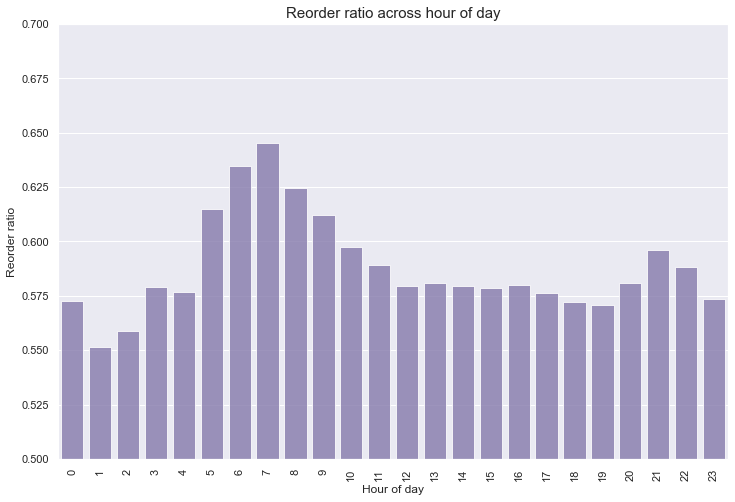

In [71]:
grouped_df = order_products.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

The reorder ratio is higher during the mornings from 6 AM to 7 AM.

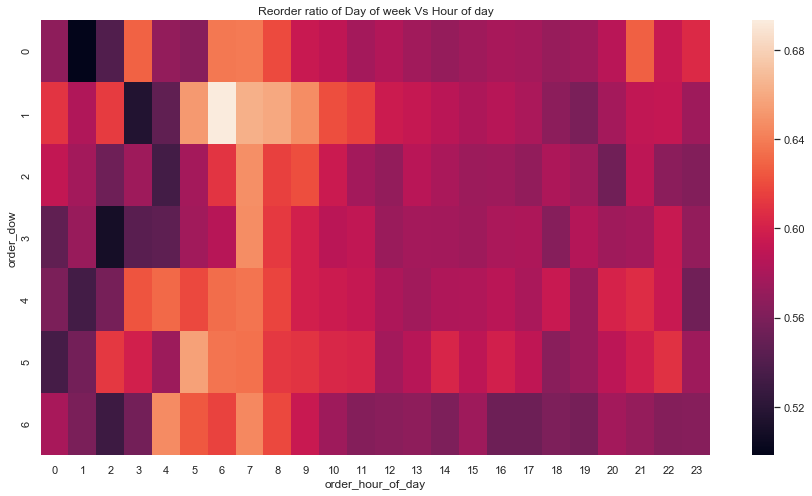

In [73]:
grouped_df = order_products.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(15,8))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

When we do the heatmap with day of the week and time, then we get to know the reorder ratio is higher during the 1st day mornings.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

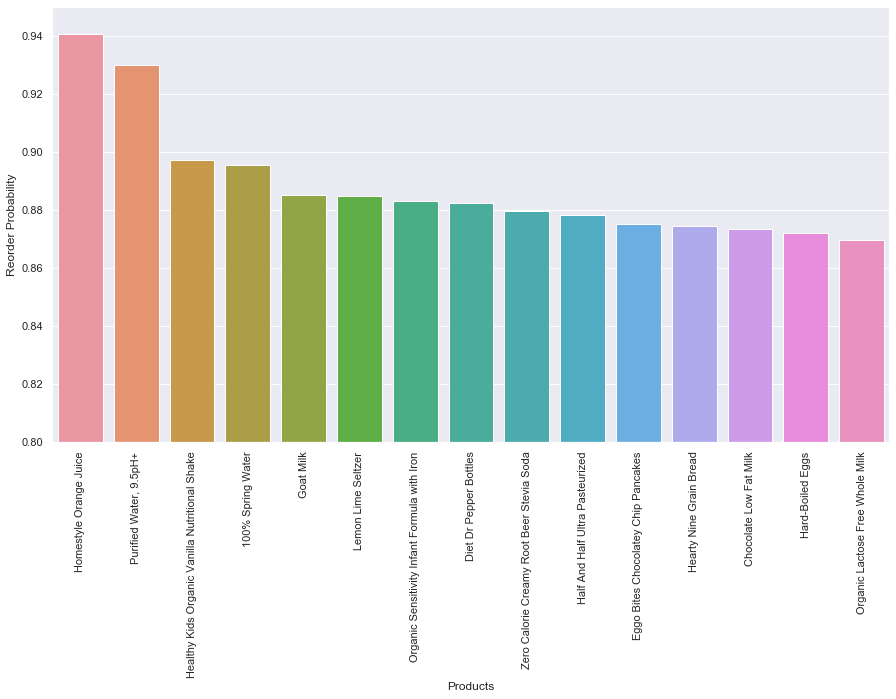

In [130]:
grouped = order_products.groupby("product_id")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:15]
#grouped

plt.figure(figsize = (15,8))
sns.barplot(x = 'product_name', y = 'reorder_probability', data = grouped)
plt.xlabel('Products')
plt.ylabel('Reorder Probability')
plt.ylim(0.8, 0.95)
plt.xticks(rotation = 'vertical')

## Association Rules Mining

In [7]:
import sys
from itertools import combinations, groupby
from collections import Counter

In [8]:
items = order_products.set_index('order_id')['product_id'].rename('item_id')
items.head(10)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
4    46842
Name: item_id, dtype: int64

In [30]:
len(orders.order_id.unique())

414772

In [75]:
print('Dimensions: {0}; \nUnique_orders: {1}; \nUnique_items: {2}'.
     format(items.shape, len(items.index.unique()), len(items.value_counts())))

Dimensions: (3923788,); 
Unique_orders: 389772; 
Unique_items: 42814


## Association Rules Function

### A. Helper functions to the main association rules function

In [9]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else:
        return pd.Series(Counter(iterable)).rename("freq")
    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))

# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_project in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_project]
        
        for item_pair in combinations(item_list, 2):
            yield item_pair
            
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs.
            merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), 
                  left_on = 'item_A', right_index=True).
           merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), 
                 left_on = 'item_B', right_index=True))

# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB', 'supportB', 'confidenceAtoB',
              'confidenceBtoA', 'lift']
    rules = (rules.merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id').
            merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

### B. Association Rules function

In [10]:
def association_rules(order_item, min_support):
    
    print("Starting order_item: {:22d}".format(len(order_item)))
    
    #Calculate item frequency and support
    item_stats = freq(order_item).to_frame("freq")
    item_stats["support"] = item_stats['freq']/order_count(order_item) * 100
    
    # Filter from order_item items below min support
    qualifying_items = item_stats[item_stats["support"] >= min_support].index
    order_item = order_item[order_item.isin(qualifying_items)]
    
    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))
    
    # Filter from order_item orders with less than 2 items
    order_size = freq(order_item.index)
    qualifying_orders = order_size[order_size>=2].index
    order_item = order_item[order_item.index.isin(qualifying_orders)]
    
    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))
    
    # Recalculate item frequency and support
    item_stats = freq(order_item).to_frame("freq")
    item_stats['support'] = item_stats['freq'] / order_count(order_item) * 100
    
    # Get item pairs generator
    item_pair_gen = get_item_pairs(order_item)
    
    # Calculate item pair frequency and support
    item_pairs = freq(item_pair_gen).to_frame("freqAB")
    item_pairs["supportAB"] = item_pairs['freqAB'] / len(qualifying_orders) * 100
    
    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))
    
    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift'] = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending = False)

In [11]:
%%time
rules = association_rules(items, 0.01)

Starting order_item:                3923788
Items with support >= 0.01:           11062
Remaining order_item:               3631558
Remaining orders with 2+ items:      365914
Remaining order_item:               3609865
Item pairs with support >= 0.01:    8561384

Wall time: 1min


In [12]:
item_name = products.rename(columns={'product_id': 'item_id', 'product_name': 'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending = False)

,itemA,itemB,freqAB,lift
0,Savory Shreds with Salmon in Sauce Cat Food,Turkey Flavor Cat Treats,26,59.498211
1,Savory Shreds with Ocean Whitefish & Tuna in S...,Turkey Flavor Cat Treats,28,53.168614
77,Savory Shreds with Salmon in Sauce Cat Food,Cat Treats Temptations Seafood Medley,26,39.990601
259,Savory Shreds with Salmon in Sauce Cat Food,Savory Shreds with Ocean Whitefish & Tuna in S...,20,39.925150
226275,Smoothie Fruits Squished The Purple One Over 6...,"Smoothie Fruits, Squished, The Green One, Over...",21,38.927021
833941,Blueberry Banana Walnut Hot Oats,Hot Strawberry Raspberry Oats,21,37.890503
1338911,Spinach Hummus,Herbal Berry DeTox Tea,16,37.529641
78,Savory Shreds with Ocean Whitefish & Tuna in S...,Cat Treats Temptations Seafood Medley,29,37.012578
1468917,Rice Bowl Chicken Fajita Frozen Dinner,Ham and Cheese Scramble Tasty American Favorites,33,36.859469
1534818,Organic Chicken Cat Food,"Crunchy Pea Snack, Baked, Organic, Southwest S...",19,36.380774


In [15]:
rules_final.head(10)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Savory Shreds with Salmon in Sauce Cat Food,Turkey Flavor Cat Treats,26,0.007105,39,0.010658,41,0.011205,0.666667,0.634146,59.498211
1,Savory Shreds with Ocean Whitefish & Tuna in S...,Turkey Flavor Cat Treats,28,0.007652,47,0.012845,41,0.011205,0.595745,0.682927,53.168614
77,Savory Shreds with Salmon in Sauce Cat Food,Cat Treats Temptations Seafood Medley,26,0.007105,39,0.010658,61,0.016671,0.666667,0.426230,39.990601
259,Savory Shreds with Salmon in Sauce Cat Food,Savory Shreds with Ocean Whitefish & Tuna in S...,20,0.005466,39,0.010658,47,0.012845,0.512821,0.425532,39.925150
226275,Smoothie Fruits Squished The Purple One Over 6...,"Smoothie Fruits, Squished, The Green One, Over...",21,0.005739,47,0.012845,42,0.011478,0.446809,0.500000,38.927021
833941,Blueberry Banana Walnut Hot Oats,Hot Strawberry Raspberry Oats,21,0.005739,52,0.014211,39,0.010658,0.403846,0.538462,37.890503
1338911,Spinach Hummus,Herbal Berry DeTox Tea,16,0.004373,39,0.010658,40,0.010932,0.410256,0.400000,37.529641
78,Savory Shreds with Ocean Whitefish & Tuna in S...,Cat Treats Temptations Seafood Medley,29,0.007925,47,0.012845,61,0.016671,0.617021,0.475410,37.012578
1468917,Rice Bowl Chicken Fajita Frozen Dinner,Ham and Cheese Scramble Tasty American Favorites,33,0.009019,52,0.014211,63,0.017217,0.634615,0.523810,36.859469
1534818,Organic Chicken Cat Food,"Crunchy Pea Snack, Baked, Organic, Southwest S...",19,0.005192,49,0.013391,39,0.010658,0.387755,0.487179,36.380774


In [133]:
rules_final[['itemA', 'itemB', 'freqAB']].sort_values(by = ['freqAB'], ascending = False).head(10)

,itemA,itemB,freqAB
833937,Bag of Organic Bananas,Organic Strawberries,4743
833940,Banana,Organic Strawberries,4731
825259,Bag of Organic Bananas,Organic Hass Avocado,4449
2709832,Banana,Organic Avocado,4365
788699,Banana,Organic Baby Spinach,4212
788697,Bag of Organic Bananas,Organic Baby Spinach,4144
1286483,Banana,Strawberries,3590
781012,Banana,Large Lemon,3407
130477,Organic Hass Avocado,Bag of Organic Bananas,3139
1277796,Banana,Organic Fuji Apple,3007


In [135]:
rules_final[['itemA', 'itemB', 'freqAB', 'confidenceAtoB']].sort_values(by = ['confidenceAtoB'], ascending = False).head(10)

,itemA,itemB,freqAB,confidenceAtoB
820025,DairyPure Fat Free Milk,Organic Hass Avocado,29,0.725000
440,Savory Shreds with Salmon in Sauce Cat Food,Temptations Tasty Chicken Flavor Cat Treats,27,0.692308
1345343,Spinach Hummus,Vegan Chao Creamy Original Cheese Slices,27,0.692308
0,Savory Shreds with Salmon in Sauce Cat Food,Turkey Flavor Cat Treats,26,0.666667
77,Savory Shreds with Salmon in Sauce Cat Food,Cat Treats Temptations Seafood Medley,26,0.666667
5658002,Ginger Lemon Gummi Candy,Pineapple Cottage Doubles,27,0.642857
993235,Jumbone Mini Toy/Small (PS #5129732) Dog Care ...,Boneless Skinless Chicken Breast Fillets,25,0.641026
441,Savory Shreds with Ocean Whitefish & Tuna in S...,Temptations Tasty Chicken Flavor Cat Treats,30,0.638298
1468917,Rice Bowl Chicken Fajita Frozen Dinner,Ham and Cheese Scramble Tasty American Favorites,33,0.634615
153548,Rice Bowl Chicken Fajita Frozen Dinner,Dulce de Leche Caramel Ice Cream,33,0.634615


In [136]:
rules_final[['itemB', 'itemA', 'freqAB', 'confidenceBtoA']].sort_values(by = ['confidenceBtoA'], ascending = False).head(10)

,itemB,itemA,freqAB,confidenceBtoA
8016112,Unsweetened Rose Green Tea,Spring Water,31,0.775000
8422960,Tricolor Pearl Couscous,Bag of Organic Bananas,32,0.727273
3,Turkey Flavor Cat Treats,Temptations Tasty Chicken Flavor Cat Treats,28,0.682927
1,Turkey Flavor Cat Treats,Savory Shreds with Ocean Whitefish & Tuna in S...,28,0.682927
6675037,"9\"" Paper Plates",1% Low Fat Milk,45,0.652174
8464768,Pure Cane Sugar,100% Orange Juice,42,0.646154
5036245,Natural Beef & Chicken Formula Food for Cats,Grain Free Chicken Formula Cat Food,31,0.645833
4534414,Marinara Italian Sauce,Banana,32,0.640000
0,Turkey Flavor Cat Treats,Savory Shreds with Salmon in Sauce Cat Food,26,0.634146
2342752,Jumbo Franks,Cinnamon Swirl Raisin Bread,27,0.627907


## Clustering using PCA

In [95]:
order_products = pd.merge(order_products, orders, on = ['order_id', 'order_id'])
order_products = order_products.sort_values(by = ['user_id', 'order_id'])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
852617,738281,49451,1,0,Artichoke Spinach Dip,67,20,fresh dips tapenades,deli,2,4,2,10,8.0
852618,738281,32792,2,1,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,2,4,2,10,8.0
852619,738281,32139,3,0,Hommus Classic Original,67,20,fresh dips tapenades,deli,2,4,2,10,8.0
852620,738281,34688,4,0,Good Belly Probiotics Juice Drink Blueberry Ac...,31,7,refrigerated,beverages,2,4,2,10,8.0
852621,738281,36735,5,0,Organic Roasted Sliced Chicken Breast,96,20,lunch meat,deli,2,4,2,10,8.0


In [96]:
order_products.shape

(3923788, 14)

In [97]:
order_products['product_name'].value_counts()[0:10]

Banana                    58231
Bag of Organic Bananas    45699
Organic Strawberries      32203
Organic Baby Spinach      29380
Organic Hass Avocado      25958
Organic Avocado           21642
Large Lemon               18581
Limes                     17399
Strawberries              17217
Organic Whole Milk        16468
Name: product_name, dtype: int64

In [98]:
len(order_products['product_name'].unique())

42814

### Clustering customers

In [100]:
order_products['aisle'].value_counts()[0:10]

fresh fruits                     443180
fresh vegetables                 416040
packaged vegetables fruits       214421
yogurt                           176682
packaged cheese                  117396
milk                             109584
water seltzer sparkling water    102840
chips pretzels                    88132
soy lactosefree                   77567
bread                             70119
Name: aisle, dtype: int64

In [101]:
cust_prod = pd.crosstab(order_products['user_id'], order_products['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,4,0,0,0,...,1,0,6,0,0,0,0,10,0,10
12,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,1,0,0
28,0,1,0,0,0,0,1,1,0,0,...,3,1,5,0,0,0,2,1,0,8
31,0,1,0,0,0,0,1,0,0,5,...,2,16,0,1,0,0,0,2,0,2
36,0,14,0,0,0,0,0,0,0,29,...,1,0,4,0,0,0,1,16,0,3
47,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
62,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,5


In [102]:
cust_prod.shape

(25000, 134)

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [174]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5.740539,36.058845,8.681355,-16.543300,-8.511026,-0.211279,1.411652,5.687296,3.905014,-12.494864,-3.231497,-0.382015,1.065473,-5.558241,-7.713650,5.276892,-0.050711,-0.196274,0.772629,3.174871
1,-14.671315,-15.248508,4.515960,-2.770020,-0.228715,2.319488,1.593737,0.177237,-1.223714,-0.196536,0.323562,0.034425,-1.485443,0.436597,0.262902,1.004939,1.576011,0.410657,1.223066,-0.324433
2,-20.511900,6.090807,5.122688,1.031901,-1.936428,2.934660,-5.844610,-2.526627,2.505100,-0.097685,0.402136,-1.267393,-1.303783,1.924270,2.634242,-2.105019,2.905902,-1.566227,0.848571,-0.143906
3,-14.425540,-7.465346,-1.195158,-1.384685,-0.868534,0.802434,1.298284,-0.111847,0.279960,-0.523989,0.497209,0.482189,0.215958,-1.383402,1.104473,1.189199,-0.972348,0.341572,1.114136,-0.065160
4,14.545516,-13.643238,5.000635,-2.291829,-0.339620,-2.613479,-2.472741,1.381231,-1.113002,-3.910159,1.251377,1.757976,-0.489510,0.394286,2.902832,-3.581324,4.374022,-2.231376,0.696033,3.842624


(25000, 2)
          7          1
0  5.687296  36.058845
1  0.177237 -15.248508
2 -2.526627   6.090807
3 -0.111847  -7.465346
4  1.381231 -13.643238


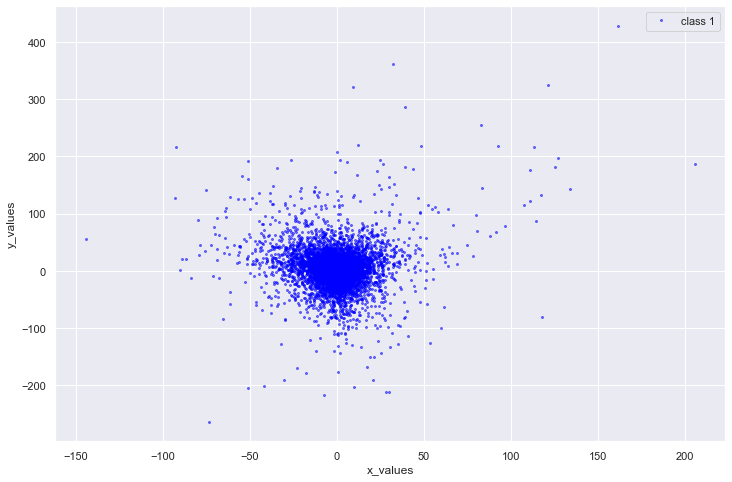

In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
toCluster = pd.DataFrame(ps[[7, 1]])
print(toCluster.shape)
print(toCluster.head())

fig = plt.figure(figsize = (12,8))
plt.plot(toCluster[7], toCluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class 1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [177]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=5, random_state=42).fit(toCluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(toCluster)
print(centers)

[[ 1.73909112e-01  8.20129454e-02]
 [ 2.66322378e+00 -7.84731042e+01]
 [ 1.24829065e+01  1.40218086e+02]
 [-4.09592436e+00  3.34405761e+01]
 [ 5.59365568e-01 -1.89564873e+01]]


In [110]:
print(c_preds[0:100])

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 3 1 0 0 2
 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0
 1 0 0 2 1 1 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


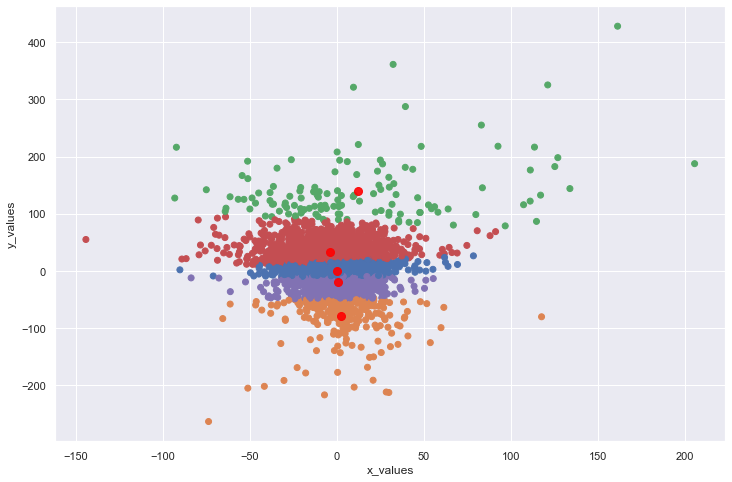

In [178]:
import matplotlib
fig = plt.figure(figsize=(12,8))
colors = sns.color_palette(n_colors=5)
colored = [colors[k] for k in c_preds]
#print (colored[0:10])
plt.scatter(toCluster[7],toCluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.legend()
plt.show()

In [179]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.shape

(25000, 135)

In [180]:
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster', axis=1).mean()
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster', axis=1).mean()
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster', axis=1).mean()
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster', axis=1).mean()
c4 = clust_prod[clust_prod['cluster']==4].drop('cluster', axis=1).mean()

In [183]:
clust_prod[clust_prod['cluster']==0].shape

(19673, 135)

In [181]:
c0.sort_values(ascending = False)[0:10]

aisle
fresh fruits                     10.583439
fresh vegetables                  8.586082
packaged vegetables fruits        5.427032
yogurt                            3.937681
packaged cheese                   3.148376
water seltzer sparkling water     2.709145
milk                              2.684491
chips pretzels                    2.384385
soy lactosefree                   1.975601
refrigerated                      1.907640
dtype: float64

In [182]:
c1.sort_values(ascending = False)[0:10]

aisle
fresh vegetables              175.353952
fresh fruits                   84.731959
packaged vegetables fruits     44.790378
fresh herbs                    19.577320
soy lactosefree                14.879725
packaged cheese                14.580756
yogurt                         13.171821
milk                           11.704467
frozen produce                 10.749141
chips pretzels                  9.738832
dtype: float64

In [184]:
c2.sort_values(ascending = False)[0:10]

aisle
yogurt                           140.054688
fresh fruits                     124.390625
energy granola bars               58.382812
water seltzer sparkling water     38.773438
packaged vegetables fruits        36.625000
milk                              35.203125
chips pretzels                    30.507812
packaged cheese                   29.375000
refrigerated                      25.445312
candy chocolate                   22.695312
dtype: float64

In [185]:
c3.sort_values(ascending = False)[0:10]

aisle
fresh fruits                     57.563181
yogurt                           31.330610
fresh vegetables                 22.808824
packaged vegetables fruits       22.525054
milk                             18.163943
water seltzer sparkling water    15.983115
packaged cheese                  14.473856
chips pretzels                   12.601307
baby food formula                10.321351
energy granola bars               9.189542
dtype: float64

In [186]:
c4.sort_values(ascending = False)[0:10]

aisle
fresh vegetables                 49.377279
fresh fruits                     28.875977
packaged vegetables fruits       15.812826
packaged cheese                   6.797201
yogurt                            6.488607
fresh herbs                       5.656576
soy lactosefree                   5.228841
milk                              5.049154
frozen produce                    4.542969
water seltzer sparkling water     4.189128
dtype: float64